In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import geopandas as gpd

In [2]:
path = r'D:\GU\IC\Stations_data\ANA_DATA\CSV\climate_raw'
files = glob(os.path.join(path, '*.csv'))

In [3]:
li = []
for file in files:
    df = pd.read_csv(file, encoding='latin-1', skiprows=38, delimiter=';', index_col=False, usecols=[0,1,2,3,4,5,6,7,8], decimal=',', parse_dates=[2], dayfirst=True)
    idx = df['EstacaoCodigo'][0]
    li.append(df)
    #df.to_csv(r'C:\Users\luisg\OneDrive\Documentos\Python_Scripts\data\clean\\' + str(idx) + '.csv', index=False)

frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.rename(columns={'EstacaoCodigo':'Code','NivelConsistencia':'Consistency', 'Data': 'Date'})
frame.to_pickle('climate_all.pkl')   
   

KeyboardInterrupt: 

# cerrado

In [6]:
ibge = gpd.read_file(r'D:\GU\IC\Shapes\AtlasMar_BiomasBrasil.shp')
ibge.drop(0, inplace=True)
shp_cerrado = ibge[ibge.biomas == 'CERRADO']
gdf = gpd.read_file('stations.geojson').to_crs(ibge.crs)
df_cerrado = pd.read_pickle('df_cerrado.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_cerrado.Code.unique())]

# all

In [32]:
gdf_climate = gdf[gdf.Code.isin(frame.Code.unique())]
gdf_climate

,Code,Name,Latitude,Longitude,Altitude,geometry
705,1346003,MONTE ALEGRE DE GOIÁS,-13.0900,-46.8867,559.0,POINT (-46.88670 -13.09000)
715,2851044,GUAPORÉ,-28.8444,-51.8792,520.0,POINT (-51.87920 -28.84440)
1012,1652001,PONTE BRANCA,-16.7664,-52.8372,380.0,POINT (-52.83720 -16.76640)
1084,1656004,SÃO JOÃO,-16.9442,-56.6319,116.0,POINT (-56.63190 -16.94420)
1109,1245015,RODA VELHA,-12.7653,-45.9439,761.0,POINT (-45.94390 -12.76530)
...,...,...,...,...,...,...
20317,2750003,ENCRUZILHADA II,-27.5078,-50.1128,800.0,POINT (-50.11280 -27.50780)
20377,2750011,PONTE ALTA DO SUL,-27.4819,-50.3850,880.0,POINT (-50.38500 -27.48190)
20616,2850008,PASSO SOCORRO,-28.2108,-50.7586,640.0,POINT (-50.75860 -28.21080)
20628,1744032,FAZENDA ROMPEDIA,-17.3000,-44.2831,NaN,POINT (-44.28310 -17.30000)


In [36]:
gdf_ibge_clima = gpd.sjoin(gdf_climate, ibge, how='inner', op='intersects')
gdf_ibge_clima.groupby('biomas').count()


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Code,Name,Latitude,Longitude,Altitude,geometry,index_right,id,objectid,shape_leng,shape_area
biomas,,,,,,,,,,,
AMAZÔNIA,72,72,72,72,66,72,72,0,72,72,72
CAATINGA,83,83,83,83,81,83,83,0,83,83,83
CERRADO,142,142,142,142,141,142,142,0,142,142,142
MATA ATLÂNTICA,334,334,334,334,323,334,334,0,334,334,334
PAMPA,34,34,34,34,33,34,34,0,34,34,34
PANTANAL,7,7,7,7,7,7,7,0,7,7,7


Text(0.5, 1.0, 'Climate Stations in Brazil')

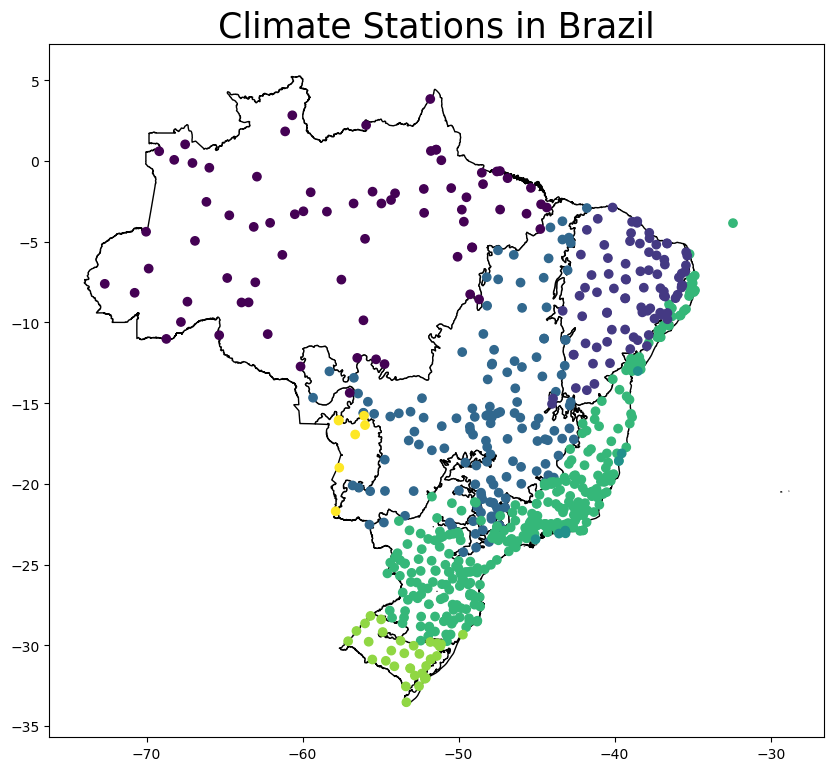

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
ibge.plot(ax = ax, color='white', edgecolor='black')
gdf_ibge_clima.plot(ax = ax, column='biomas', cmap='viridis')
#set title
ax.set_title('Climate Stations in Brazil', fontdict={'fontsize': '25', 'fontweight' : '3'})
#gdf_filtered[~gdf_filtered.Code.isin(gdf_ibge_clima.Code.unique())].plot(ax = ax, color='red')

# filtered stations

In [4]:
frame = pd.read_pickle('climate_all.pkl')

In [12]:
frame.Code.unique().shape

(688,)

In [13]:
df_filtered = pd.read_pickle('ANA_81_10_dbm1.pkl')
gdf_filtered = gdf[gdf.Code.isin(df_filtered.Code.unique())]

In [14]:
gdf_climate_filtered = gdf_filtered[gdf_filtered.Code.isin(frame.Code.unique())]
gdf_climate_filtered 

,Code,Name,Latitude,Longitude,Altitude,geometry
1084,1656004,SÃO JOÃO,-16.9442,-56.6319,116.00,POINT (-56.63190 -16.94420)
1510,1651001,IPORÁ,-16.4281,-51.0828,602.00,POINT (-51.08280 -16.42810)
1592,1249002,PROJETO RIO FORMOSO,-11.8394,-49.7717,196.00,POINT (-49.77170 -11.83940)
1674,1242015,BROTAS DE MACAÚBAS,-12.0036,-42.6283,837.00,POINT (-42.62830 -12.00360)
1848,2549006,CURITIBA,-25.4333,-49.2667,924.00,POINT (-49.26670 -25.43330)
...,...,...,...,...,...,...
19516,152001,PORTO DE MOZ,-1.7333,-52.2333,15.93,POINT (-52.23330 -1.73330)
20094,1549001,GOIANÉSIA,-15.3292,-49.1217,662.00,POINT (-49.12170 -15.32920)
20159,2653012,FRANCISCO BELTRÃO,-26.0833,-53.0667,650.00,POINT (-53.06670 -26.08330)
20377,2750011,PONTE ALTA DO SUL,-27.4819,-50.3850,880.00,POINT (-50.38500 -27.48190)


In [15]:
gdf_ibge_clima_filtered = gpd.sjoin(gdf_climate_filtered, ibge, how='inner', op='intersects')
gdf_ibge_clima_filtered.groupby('biomas').count()


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Code,Name,Latitude,Longitude,Altitude,geometry,index_right,id,objectid,shape_leng,shape_area
biomas,,,,,,,,,,,
AMAZÔNIA,14,14,14,14,13,14,14,0,14,14,14
CAATINGA,2,2,2,2,2,2,2,0,2,2,2
CERRADO,17,17,17,17,17,17,17,0,17,17,17
MATA ATLÂNTICA,42,42,42,42,42,42,42,0,42,42,42
PAMPA,6,6,6,6,6,6,6,0,6,6,6
PANTANAL,1,1,1,1,1,1,1,0,1,1,1


Text(0.5, 1.0, 'ANA Climate Stations')

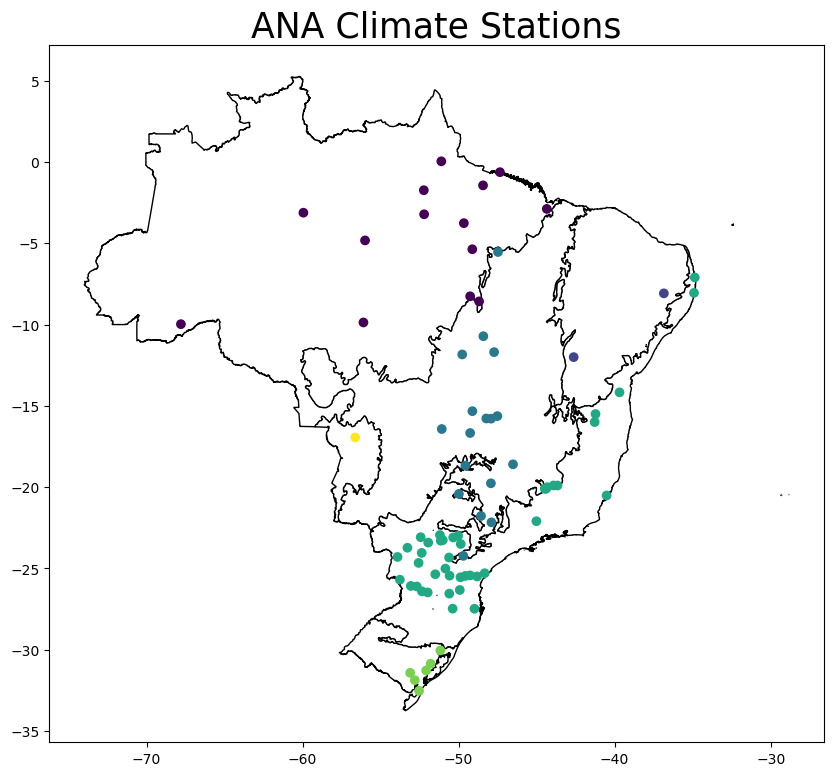

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ibge.plot(ax = ax, color='white', edgecolor='black')
gdf_ibge_clima_filtered.plot(ax = ax, column='biomas', cmap='viridis')
#set title
ax.set_title('ANA Climate Stations', fontdict={'fontsize': '25', 'fontweight' : '3'})
#gdf_filtered[~gdf_filtered.Code.isin(gdf_ibge_clima.Code.unique())].plot(ax = ax, color='red')

# all cerrado

In [62]:
frame_cerrado = frame[frame.Code.isin(gdf_ibge_clima[gdf_ibge_clima.biomas == 'CERRADO'].Code.unique())]

In [87]:
frame_cerrado.ParametroClima.value_counts()

90     43803
100    37333
70     24153
12     23099
11     22911
60     12731
80     10633
61      7932
62      7591
91      7261
92      7250
51      6333
41      6225
22      5887
52      5823
21      5797
10      1626
43       945
40       328
50       216
71       191
23       116
42        29
20         4
31         3
96         1
13         1
30         1
85         1
53         1
72         1
54         1
19         1
89         1
14         1
44         1
68         1
Name: ParametroClima, dtype: int64

<AxesSubplot: >

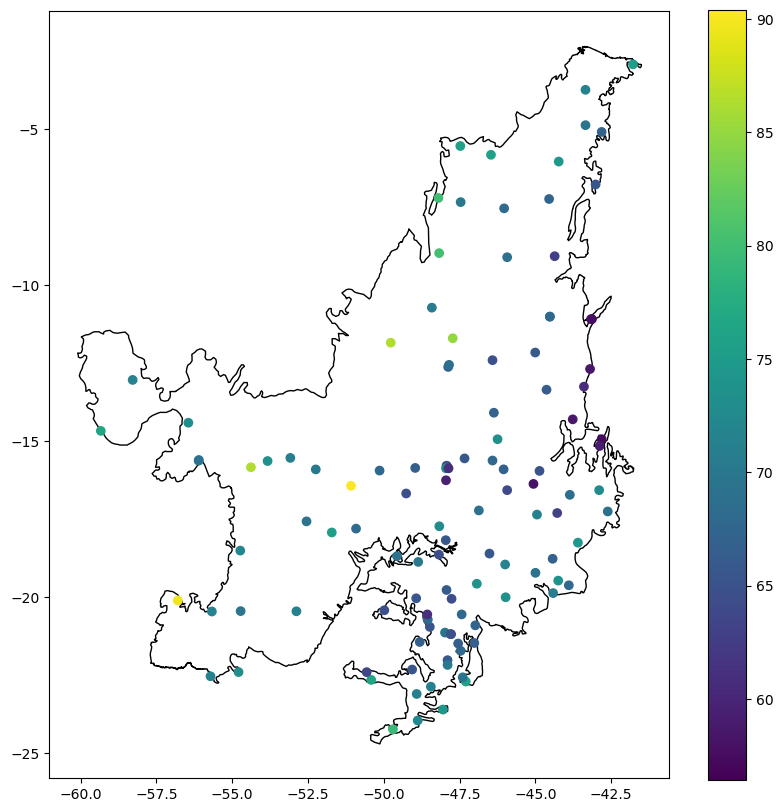

In [96]:
frame_cerrado_uh = frame_cerrado[frame_cerrado.ParametroClima == 90].groupby('Code')['Media'].mean()
fig, ax = plt.subplots(figsize=(10,10))
shp_cerrado.plot(color='white', edgecolor='black', ax=ax)
gdf_ibge_clima[gdf_ibge_clima.biomas == 'CERRADO'].merge(frame_cerrado_uh, on='Code').plot(column='Media', cmap='viridis', legend=True, ax=ax)

Text(0.5, 1.0, 'Average dry Bulb Temperature in Cerrado')

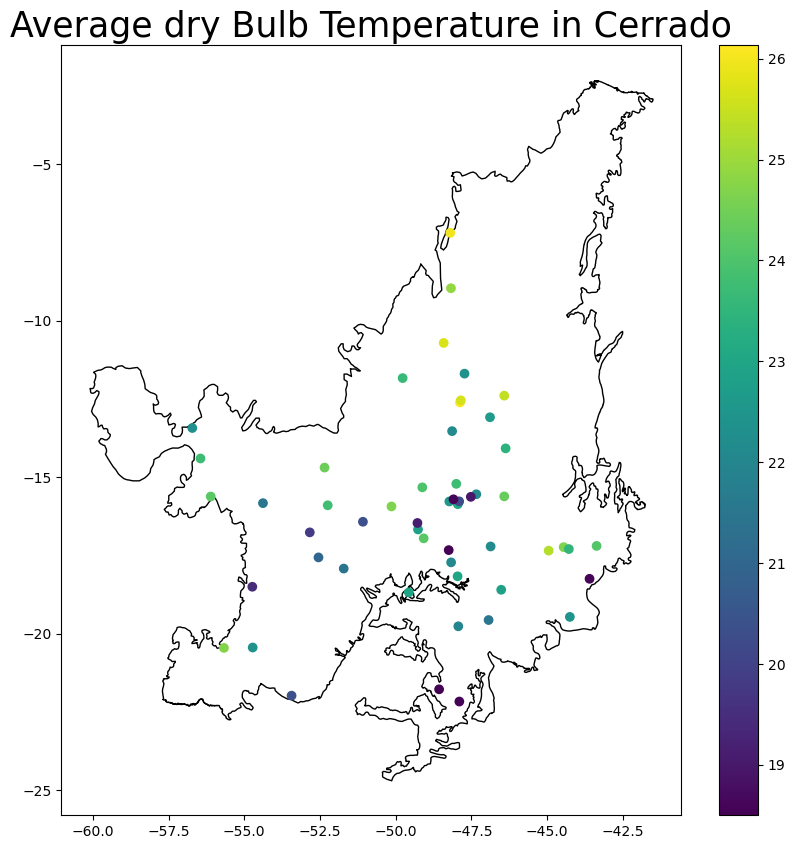

In [100]:
frame_cerrado_tdry = frame_cerrado[frame_cerrado.ParametroClima == 91].groupby('Code')['Media'].mean()
fig, ax = plt.subplots(figsize=(10,10))
shp_cerrado.plot(color='white', edgecolor='black', ax=ax)
gdf_ibge_clima[gdf_ibge_clima.biomas == 'CERRADO'].merge(frame_cerrado_tdry, on='Code').plot(column='Media', cmap='viridis', legend=True, ax=ax)
ax.set_title('Average dry Bulb Temperature in Cerrado', fontdict={'fontsize': '25', 'fontweight' : '3'})

Text(0.5, 1.0, 'Average Wet Bulb Temperature in Cerrado')

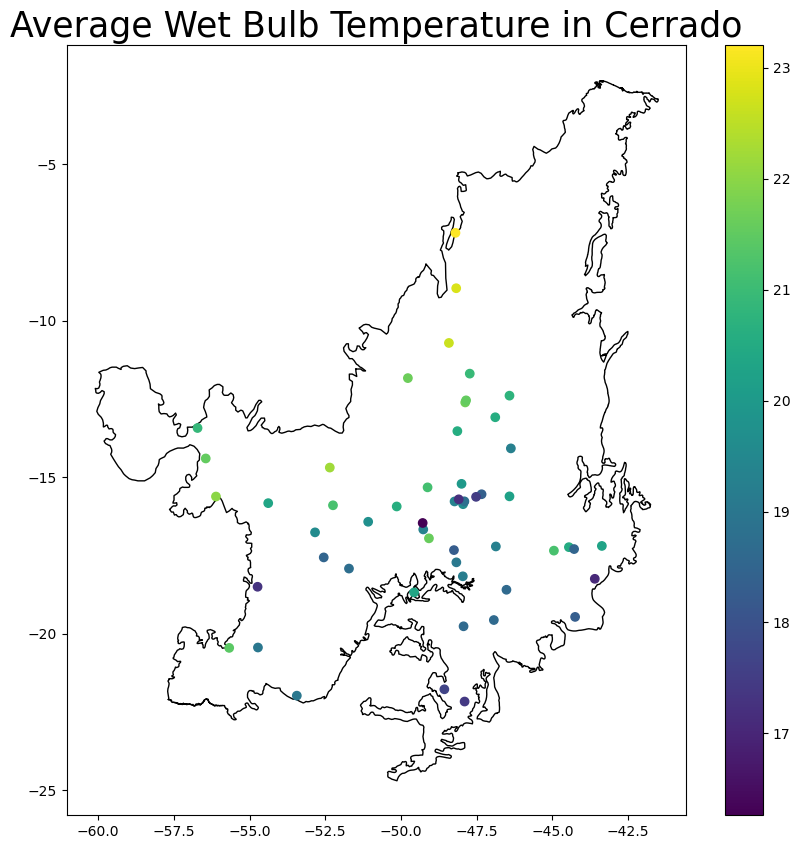

In [99]:
frame_cerrado_twet = frame_cerrado[frame_cerrado.ParametroClima == 92].groupby('Code')['Media'].mean()
fig, ax = plt.subplots(figsize=(10,10))
shp_cerrado.plot(color='white', edgecolor='black', ax=ax)
gdf_ibge_clima[gdf_ibge_clima.biomas == 'CERRADO'].merge(frame_cerrado_twet, on='Code').plot(column='Media', cmap='viridis', legend=True, ax=ax)
ax.set_title('Average Wet Bulb Temperature in Cerrado', fontdict={'fontsize': '25', 'fontweight' : '3'})


<AxesSubplot: >

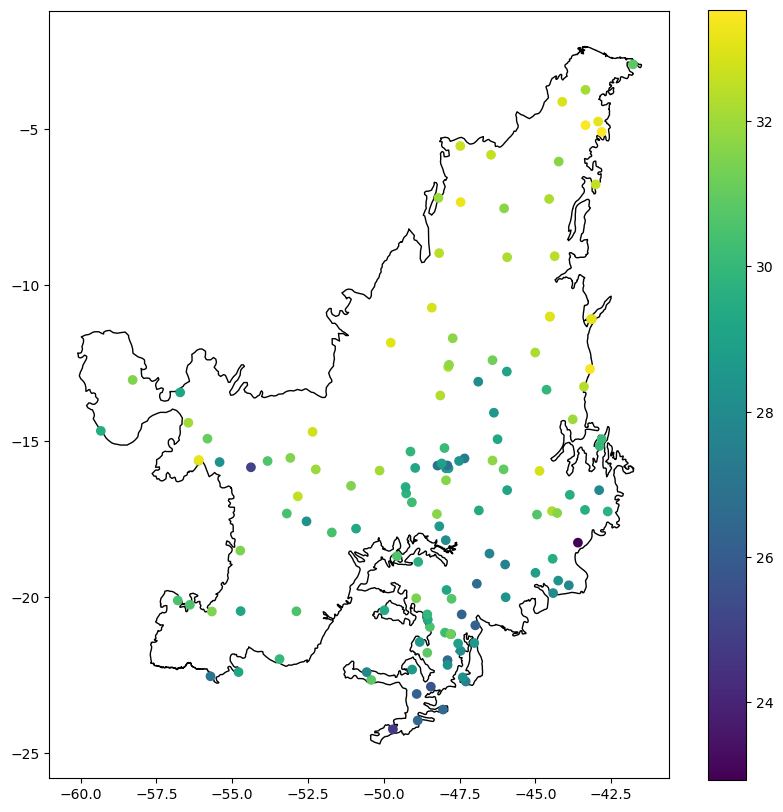

In [102]:
frame_cerrado_tmax= frame_cerrado[frame_cerrado.ParametroClima == 11].groupby('Code')['Media'].mean()
fig, ax = plt.subplots(figsize=(10,10))
shp_cerrado.plot(color='white', edgecolor='black', ax=ax)
gdf_ibge_clima[gdf_ibge_clima.biomas == 'CERRADO'].merge(frame_cerrado_tdry, on='Code').plot(column='Media', cmap='viridis', legend=True, ax=ax)
